1. Дерево решений
2. Важность признаков и нормализация
3. Shap values
4. Permitation Feature Importance

In [ ]:
!pip install shap -q

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
import shap
import matplotlib.pyplot as plt

In [ ]:
# Загрузка данных
# data = fetch_california_housing(as_frame=True)
# df = data.frame
# features = data.feature_names
# target = 'MedHouseVal'
# print(f'target = {target}')
# df.head()


In [ ]:
from sklearn.datasets import load_diabetes
data = load_diabetes(as_frame=True)
df = data.frame

features = data.feature_names
target = 'target'
print(f'target = {target}')
df.head()

target = target


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [ ]:
# Разделение данных на тренировочные и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)


In [ ]:
# Построение  дерева решений
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [ ]:
# Построение линейной регрессии
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Оценка важности переменных встроенными методами
# Для дерева решений
tree_importances = tree.feature_importances_
tree_importances_df = pd.DataFrame({'Feature': features, 'Importance': tree_importances})
tree_importances_df = tree_importances_df.sort_values(by='Importance', ascending=False)
tree_importances_df

,Feature,Importance
2,bmi,0.418232
8,s5,0.155795
4,s1,0.083177
0,age,0.064586
6,s3,0.063936
3,bp,0.062494
9,s6,0.061930
5,s2,0.053389
7,s4,0.029788
1,sex,0.006673


In [ ]:
# Для линейной регрессии
lin_reg_coefs = lin_reg.coef_
lin_reg_coefs_df = pd.DataFrame({'Feature': features, 'Coefficient': lin_reg_coefs})
lin_reg_coefs_df = lin_reg_coefs_df.sort_values(by='Coefficient', ascending=False)
lin_reg_coefs_df


,Feature,Coefficient
8,s5,736.198859
2,bmi,542.428759
5,s2,518.062277
3,bp,347.703844
7,s4,275.317902
6,s3,163.419983
9,s6,48.670657
0,age,37.904021
1,sex,-241.964362
4,s1,-931.488846


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_reg_st = LinearRegression()
lin_reg_st.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Для линейной регрессии
lin_reg_coefs = lin_reg_st.coef_
lin_reg_coefs_df = pd.DataFrame({'Feature': features, 'Coefficient': lin_reg_coefs})
lin_reg_coefs_df = lin_reg_coefs_df.sort_values(by='Coefficient', ascending=False)
lin_reg_coefs_df


,Feature,Coefficient
8,s5,35.161195
2,bmi,25.607121
5,s2,24.640954
3,bp,16.828872
7,s4,13.138784
6,s3,7.676978
9,s6,2.351364
0,age,1.753758
1,sex,-11.511809
4,s1,-44.448856


**Минусы:**

- Встроенные методы дают общую оценку важности признаков на уровне модели, но не объясняют, как конкретное предсказание зависит от признаков.

- Встроенные методы не учитывают взаимодействия между признаками.

- Отсутствие согласованности: Встроенные методы могут не быть согласованными. Например, если в модель добавляется новый признак, это может повлиять на важность уже существующих признаков, что не всегда ожидаемо или справедливо.


# SHAP

Значения SHAP основаны на значениях Шепли из теории кооперативных игр. В кооперативных играх значения Шепли распределяют общий выигрыш (или стоимость) между игроками (или признаками) на основе их вклада в общую игру. В контексте машинного обучения, игроками являются признаки модели, а выигрышем — предсказание модели.

Основные шаги вычисления SHAP значений
- Формирование коалиций признаков:

 - Рассматриваем все возможные подмножества признаков, которые могут присутствовать в модели.
 - Например, если у нас есть признаки {A, B, C}, возможные подмножества включают {}, {A}, {B}, {C}, {A, B}, {A, C}, {B, C}, {A, B, C}.

- Расчет вклада для каждого признака
 - Для каждого подмножества признаков S, вычисляем предсказание модели
𝑓(𝑆)
 - Затем добавляем интересующий признак j к этому подмножеству и снова вычисляем предсказание модели $f(S \cup \{j\})$.
 - Разница между этими двумя предсказаниями $[f(S \cup \{j\}) - f(S)]$  показывает, насколько изменилось предсказание модели при добавлении признака j к подмножеству S. Это и есть вклад признака j в данном подмножестве.

- Взвешивание вкладов:

Поскольку вклад признака может варьироваться в зависимости от других признаков, необходимо усреднить его вклад по всем возможным подмножествам.
Каждое подмножество взвешивается по формуле:
$ \frac{|S|! \cdot (|N| - |S| - 1)!}{|N|!} $ , где

$ ∣S∣ $ — количество признаков в подмножестве, а
$ ∣N∣ $ — общее количество признаков.

 - Вычисление значения SHAP:

  - Значение SHAP для признака j определяется как: $phi_j = \sum_{S \subseteq N \setminus \{j\}} \frac{|S|! \cdot (|N| - |S| - 1)!}{|N|!} [ f(S \cup \{j\}) - f(S) ] $



Значение SHAP для признака j представляет собой вклад этого признака в предсказание модели для конкретного примера. Оно позволяет понять, насколько конкретный признак изменяет предсказание модели по сравнению с базовым предсказанием, если бы этот признак не был использован.


In [ ]:
X_test.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,-0.005719,-0.000729,-0.006884,-0.004678,0.002203,0.003197,0.003923,-0.001494,-0.004823,-0.007500
std,0.052296,0.047782,0.048619,0.044035,0.047155,0.047705,0.049917,0.047173,0.046733,0.043929
min,-0.107226,-0.044642,-0.090275,-0.102070,-0.126781,-0.106845,-0.076536,-0.076395,-0.096435,-0.088062
25%,-0.045472,-0.044642,-0.042852,-0.033213,-0.027712,-0.024800,-0.036038,-0.039493,-0.038460,-0.042499
50%,-0.001882,-0.044642,-0.018062,-0.015999,-0.002945,-0.001001,0.000779,-0.002592,-0.007977,-0.009362
75%,0.038076,0.050680,0.030440,0.028758,0.034206,0.036577,0.037595,0.034309,0.030564,0.019633
max,0.110727,0.050680,0.170555,0.087287,0.125019,0.125198,0.140681,0.141322,0.098648,0.135612


In [ ]:
%%time
explainer_lin = shap.Explainer(lin_reg.predict, X_test)
# вычисляются значения SHAP для каждого примера в X_test
shap_values_lin = explainer_lin(X_test)

ExactExplainer explainer: 90it [00:18,  4.76it/s]                        

CPU times: user 9.19 s, sys: 2.61 s, total: 11.8 s
Wall time: 18.7 s


In [ ]:
# shap_values_lin

`shap.plots.waterfall` — это функция, которая создает график водопада, отображающий как различные признаки влияют на предсказание модели для конкретного примера.

`shap_values_lin[i]` — это объект значений SHAP для i-го примера. Он содержит значения SHAP для каждого признака, которые показывают, насколько каждый признак изменяет предсказание модели по сравнению с базовым уровнем.

`max_display=14` — этот параметр ограничивает количество отображаемых признаков на графике. В данном случае, будет отображаться максимум 14 наиболее значимых признаков.

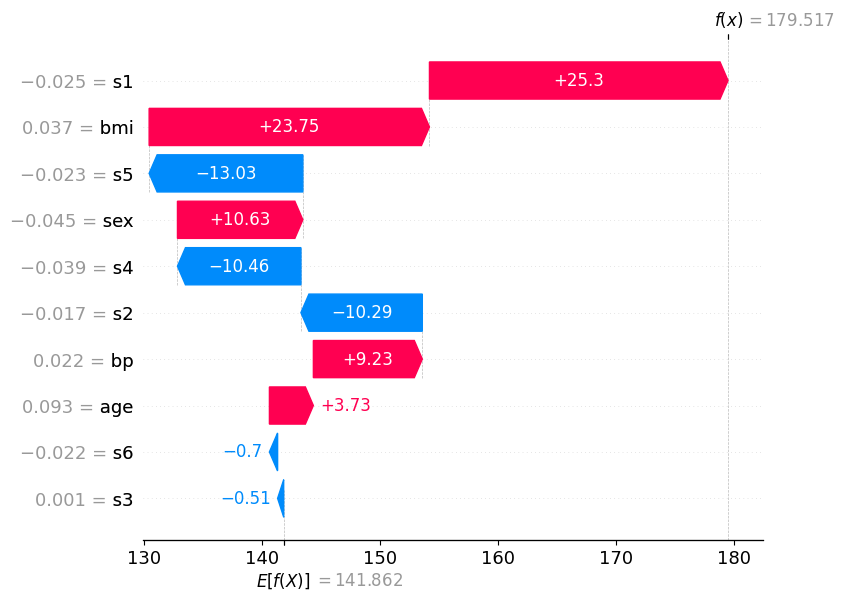

In [ ]:
i = 1
shap.plots.waterfall(shap_values_lin[i], max_display=14)

In [ ]:
141.862-0.51-0.7+3.73+9.23-10.29-10.46+10.63-13.03+23.75+25.3

179.512

In [ ]:
pred_test = lin_reg.predict(X_test)
np.mean(pred_test)

141.86244052379863

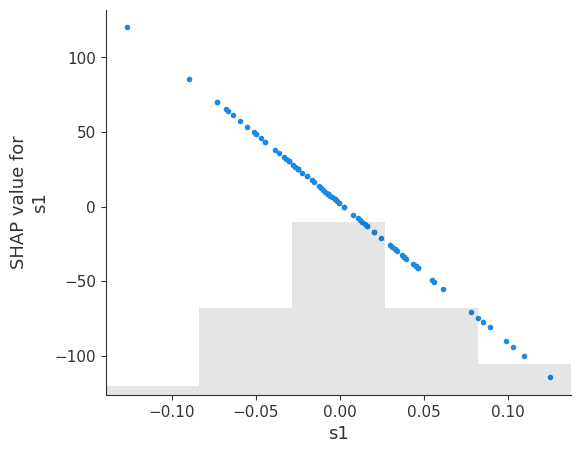

In [ ]:
# График рассеяния позволяет визуально оценить,
# как величина признака "s1" соотносится с его влиянием на предсказание модели.
shap.plots.scatter(shap_values_lin[:, "s1"])

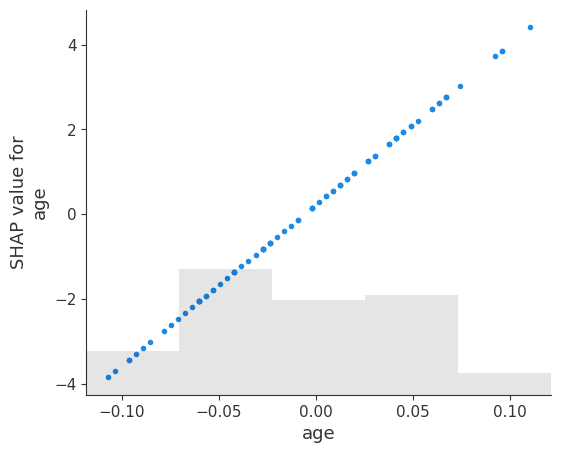

In [ ]:
shap.plots.scatter(shap_values_lin[:, "age"])

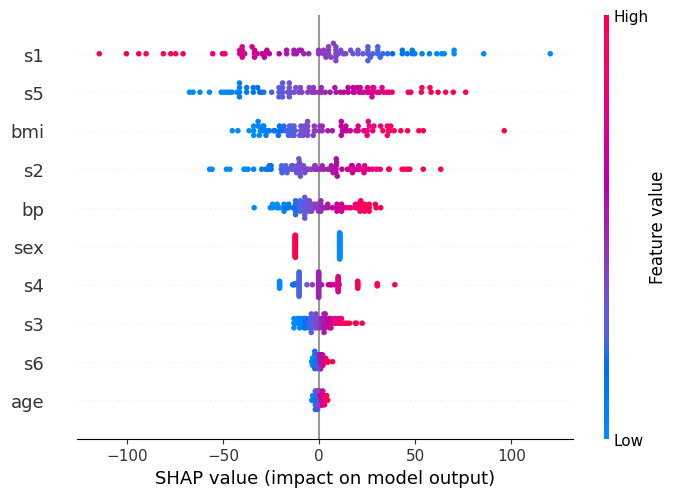

In [ ]:
# цвет точек отражает значения самого признака
# Ось X: Значения SHAP для каждого признака. Положительные значения показывают,
# насколько признак увеличивает предсказание модели по сравнению с базовым уровнем,
#  а отрицательные — насколько уменьшает
shap.plots.beeswarm(shap_values_lin)

In [ ]:
explainer_tree = shap.Explainer(tree.predict, X_test)
shap_values_tree = explainer_tree(X_test)

In [ ]:
pred_tree = tree.predict(X_test)

In [ ]:
np.mean(pred_tree)

144.2808988764045

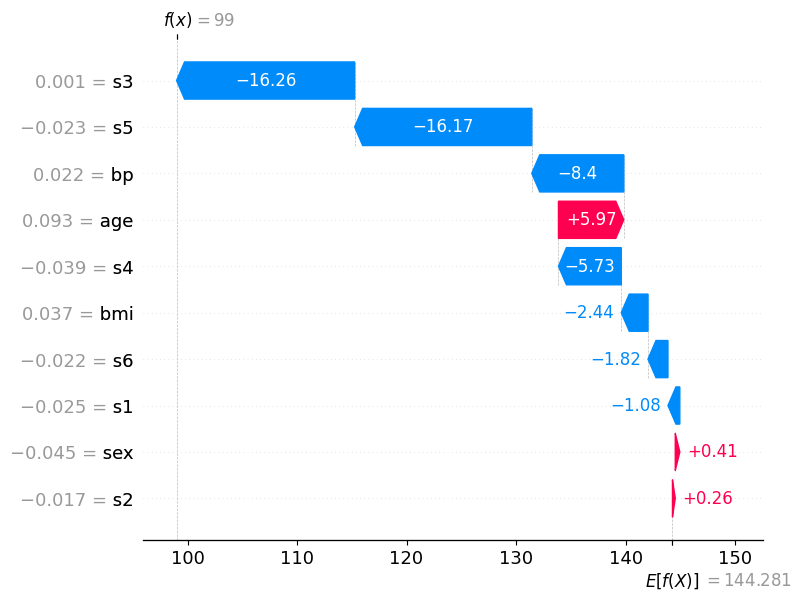

In [ ]:
i = 1
shap.plots.waterfall(shap_values_tree[i], max_display=14)

Функция shap.plots.beeswarm(shap_values_tree) из библиотеки SHAP используется для визуализации значений SHAP в виде пчелиного роя (beeswarm plot).

На данном графике  каждая точка представляет один пример данных, расположение точек по оси X отражает соответствующее значение SHAP для данного примера. Чем дальше точка находится вправо, тем больше положительный вклад в предсказание модели она вносит, и наоборот.


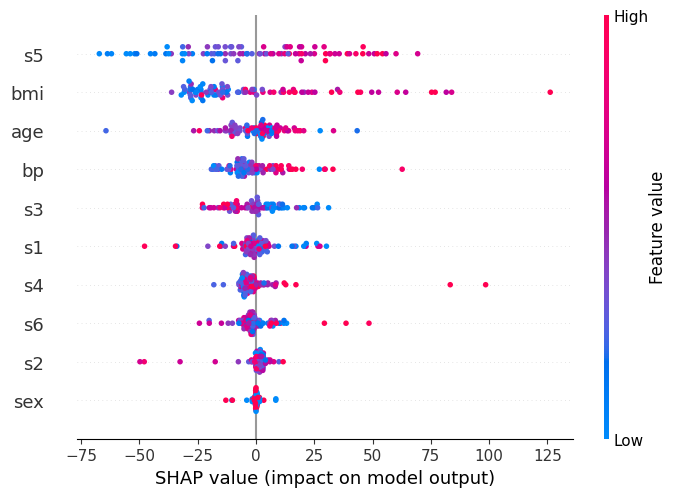

In [ ]:
shap.plots.beeswarm(shap_values_tree)

график показывает вклад каждого признака в предсказание модели. Для каждого признака выводится его среднее значение абсолютного значения SHAP по всем примерам данных.

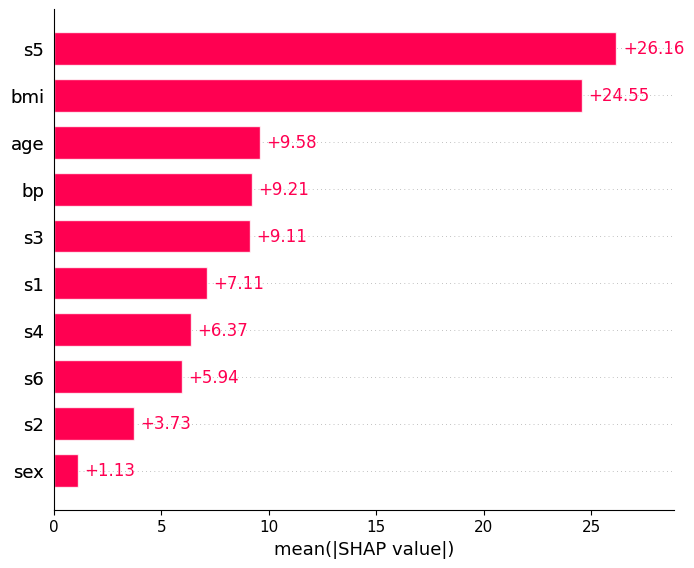

In [ ]:
shap.plots.bar(shap_values_tree)

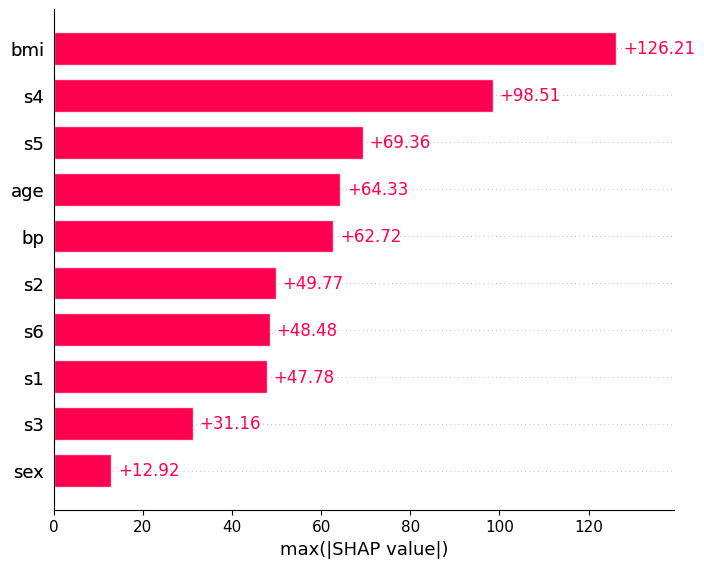

In [ ]:
shap.plots.bar(shap_values_tree.abs.max(0))

# Permitation Feature Importance


permutation_importance используется для оценки важности признаков в модели путем перемешивания значений признака и измерения изменений в качестве модели.

n_repeats: количество перестановок для оценки важности признаков (чем больше, тем точнее, но медленнее).

In [ ]:
# Оценка важности переменных методом Permutation Feature Importance
# Для дерева решений
perm_importance_tree = permutation_importance(tree, X_test, y_test, n_repeats=10, random_state=42)
perm_importance_tree_df = pd.DataFrame({'Feature': features, 'Importance': perm_importance_tree.importances_mean})
perm_importance_tree_df = perm_importance_tree_df.sort_values(by='Importance', ascending=False)

perm_importance_tree_df


,Feature,Importance
8,s5,0.310955
2,bmi,0.223325
9,s6,0.150267
3,bp,0.103333
5,s2,0.097951
4,s1,0.088385
6,s3,0.055952
0,age,0.013922
1,sex,0.000136
7,s4,-0.035228


In [ ]:
perm_importance_tree

{'importances_mean': array([ 1.39219633e-02,  1.36363008e-04,  2.23325070e-01,  1.03333470e-01,
         8.83854970e-02,  9.79514786e-02,  5.59523083e-02, -3.52276760e-02,
         3.10954951e-01,  1.50267369e-01]),
 'importances_std': array([0.08284167, 0.01092303, 0.09826178, 0.06276669, 0.07276014,
        0.02796016, 0.05200785, 0.03357482, 0.08755374, 0.08003579]),
 'importances': array([[ 0.04326716,  0.03321065,  0.00182807, -0.21413022,  0.02263032,
          0.04805152,  0.09635542, -0.02244794,  0.04766343,  0.08279122],
        [ 0.01878119, -0.01357056,  0.01576764, -0.0121115 ,  0.00045596,
         -0.00608226, -0.00959419,  0.00512369,  0.00844687, -0.00585322],
        [ 0.28462332,  0.25548659,  0.10648615,  0.20633441,  0.37567054,
          0.32285586,  0.20775318,  0.08547819,  0.08525127,  0.3033112 ],
        [-0.03068062,  0.07949348,  0.10109737,  0.20452543,  0.07254597,
          0.19380089,  0.09626635,  0.12762348,  0.11289712,  0.07576524],
        [ 0.1139

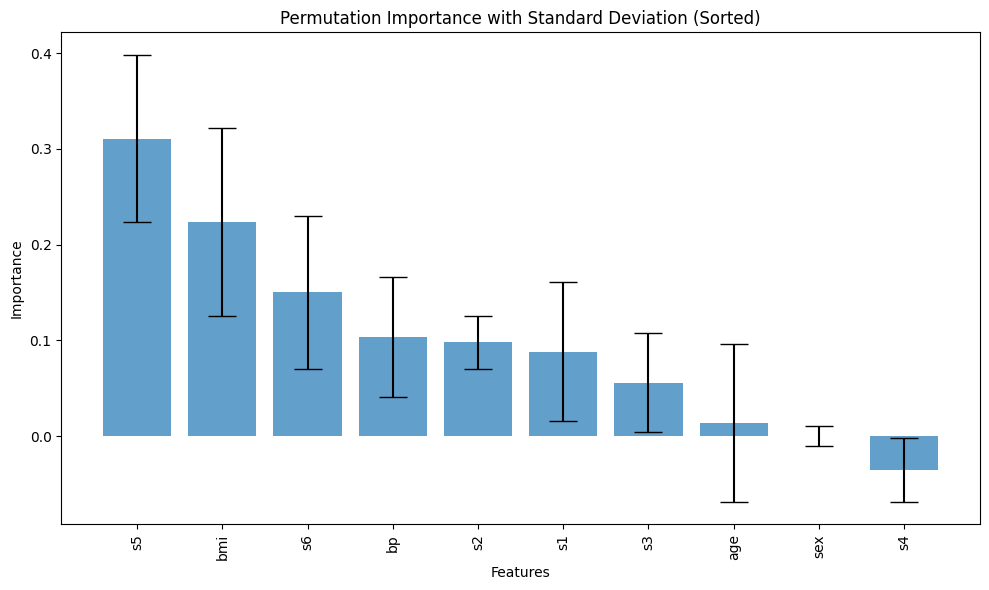

In [ ]:
# Средние значения важности признаков
importances_mean = perm_importance_tree.importances_mean

# Дисперсии важности признаков
importances_std = perm_importance_tree.importances_std


# Сортировка значений важности признаков и их дисперсии
sorted_indices = np.argsort(importances_mean)[::-1]
importances_mean_sorted = importances_mean[sorted_indices]
importances_std_sorted = importances_std[sorted_indices]
feature_names_sorted = np.array(features)[sorted_indices]

# Создаем график
plt.figure(figsize=(10, 6))

# Столбцовая диаграмма для отсортированных значений
plt.bar(range(len(importances_mean_sorted)), importances_mean_sorted, yerr=importances_std_sorted, align='center', alpha=0.7, ecolor='black', capsize=10)

# Добавляем подписи к осям
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Permutation Importance with Standard Deviation (Sorted)')

# Добавляем подписи для оси x с названиями признаков
plt.xticks(range(len(importances_mean_sorted)), feature_names_sorted, rotation='vertical')

# Отображаем график
plt.tight_layout()
plt.show()

In [ ]:
# Для линейной регрессии
perm_importance_lin_reg = permutation_importance(lin_reg, X_test, y_test, n_repeats=10, random_state=42)
perm_importance_lin_reg_df = pd.DataFrame({'Feature': features, 'Importance': perm_importance_lin_reg.importances_mean})
perm_importance_lin_reg_df = perm_importance_lin_reg_df.sort_values(by='Importance', ascending=False)

perm_importance_lin_reg_df

,Feature,Importance
4,s1,0.646898
8,s5,0.476232
5,s2,0.245516
2,bmi,0.208983
1,sex,0.084489
6,s3,0.056400
3,bp,0.044422
7,s4,0.031633
9,s6,0.003071
0,age,-0.004572
